<a href="https://colab.research.google.com/github/pushpa987/CODSOFT/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
credit_card_data = pd.read_csv('/content/fraudTest.csv',parse_dates=['trans_date_trans_time',])

In [5]:
credit_card_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [6]:
credit_card_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
credit_card_data['hour'] = credit_card_data.trans_date_trans_time.dt.hour

In [8]:
credit_card_data['hourEnc'] = 0
credit_card_data.loc[credit_card_data.hour < 5,'hourEnc'] = 1
credit_card_data.loc[credit_card_data.hour > 21,'hourEnc'] = 1

In [9]:
credit_card_data['trans_date_trans_time'] = pd.to_datetime(credit_card_data['trans_date_trans_time'])

# Sorting the DataFrame based on the transaction time
credit_card_data.sort_values(by='trans_date_trans_time', inplace=True)

# Adding frequencies for last 1, 7, and 30 days
credit_card_data['transactions_last_1d'] = credit_card_data['trans_date_trans_time'].rolling(window=1).count()
credit_card_data['transactions_last_7d'] = credit_card_data['trans_date_trans_time'].rolling(window=7).count()
credit_card_data['transactions_last_30d'] = credit_card_data['trans_date_trans_time'].rolling(window=30).count()

# Filling NaN values with 0 for the initial rows with no history
credit_card_data['transactions_last_1d'].fillna(0, inplace=True)
credit_card_data['transactions_last_7d'].fillna(0, inplace=True)
credit_card_data['transactions_last_30d'].fillna(0, inplace=True)


<ipython-input-9-3b10ffe120c3>:7: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  credit_card_data['transactions_last_1d'] = credit_card_data['trans_date_trans_time'].rolling(window=1).count()
<ipython-input-9-3b10ffe120c3>:8: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  credit_card_data['transactions_last_7d'] = credit_card_data['trans_date_trans_time'].rolling(window=7).count()
<ipython-input-9-3b10ffe120c3>:9: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  credit_card_data['transactions_last_30d'] = credit_card_data['trans_date_trans_time'].rolling(window=30).count()


In [10]:
credit_card_data['trans_date_trans_time'] = pd.to_datetime(credit_card_data['trans_date_trans_time'])

def last1DayTransactionCount(group):
    return group['trans_date_trans_time'].rolling(window=1).count()

def last7DaysTransactionCount(group):
    return group['trans_date_trans_time'].rolling(window=7).count()

def last30DaysTransactionCount(group):
    return group['trans_date_trans_time'].rolling(window=30).count()

# Group by 'cc_num' and apply the custom functions
df1 = credit_card_data.groupby('cc_num').apply(last1DayTransactionCount)
df1 = credit_card_data.groupby('cc_num').apply(last30DaysTransactionCount)

# Resetting the index to obtain a DataFrame
df1 = df1.reset_index(level=0, drop=True)

<ipython-input-10-55eb77247f69>:4: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  return group['trans_date_trans_time'].rolling(window=1).count()
<ipython-input-10-55eb77247f69>:10: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  return group['trans_date_trans_time'].rolling(window=30).count()


In [11]:
credit_card_data['trans_date_trans_time'] = pd.to_datetime(credit_card_data['trans_date_trans_time'])

def last1DayTransactionCount(group):
    return group.resample('1D', on='trans_date_trans_time').size()

def last7DaysTransactionCount(group):
    return group.resample('7D', on='trans_date_trans_time').size()

def last30DaysTransactionCount(group):
    return group.resample('30D', on='trans_date_trans_time').size()

def timeSinceLastTransaction(group):
    return group['trans_date_trans_time'].diff().dt.total_seconds()

# Group by 'cc_num' and apply the custom functions
df1 = credit_card_data.groupby('cc_num').apply(last1DayTransactionCount)
df1 = credit_card_data.groupby('cc_num').apply(last7DaysTransactionCount)
df1 = credit_card_data.groupby('cc_num').apply(last30DaysTransactionCount)
df1['time_diff'] = credit_card_data.groupby('cc_num').apply(timeSinceLastTransaction)

# Resetting the index to obtain a DataFrame
df1 = df1.reset_index(level=0, drop=True)

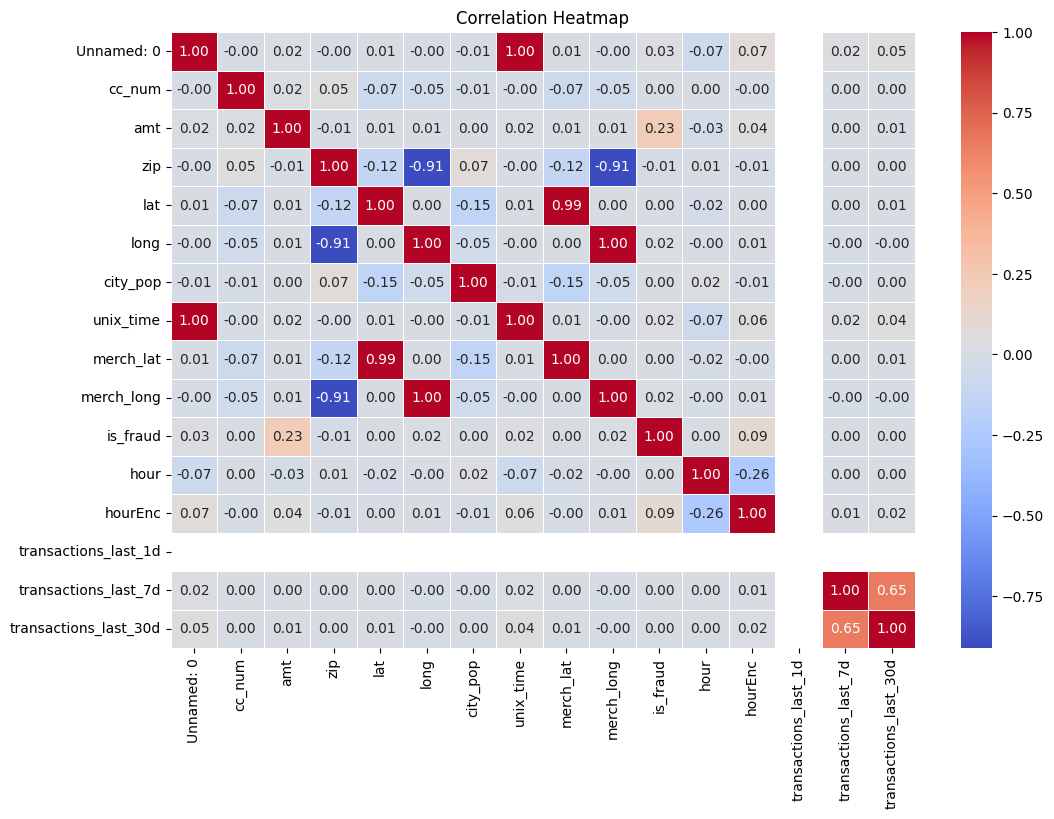

In [12]:
# Drop non-numeric columns
numeric_data = credit_card_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
numeric_columns = credit_card_data.select_dtypes(include='number')
fraud_correlation = numeric_columns.corr()['is_fraud'].abs().sort_values(ascending=False)

print(fraud_correlation)

is_fraud                 1.000000
amt                      0.230560
hourEnc                  0.091727
Unnamed: 0               0.026061
unix_time                0.024737
merch_long               0.016813
long                     0.016492
zip                      0.013428
cc_num                   0.002117
transactions_last_30d    0.001865
city_pop                 0.001435
lat                      0.001196
hour                     0.001101
transactions_last_7d     0.000873
merch_lat                0.000325
transactions_last_1d          NaN
Name: is_fraud, dtype: float64


In [ ]:
# Load train and test datasets
test_data = pd.read_csv('/content/fraudTest.csv')
train_data = pd.read_csv('/content/fraudTrain.csv')


# Drop non-numeric and non-binary columns for simplicity
numeric_columns_train = train_data.select_dtypes(include='number')
numeric_columns_test = test_data.select_dtypes(include='number')

X_train = numeric_columns_train.drop(['is_fraud'], axis=1)
y_train = train_data['is_fraud']

X_test = numeric_columns_test.drop(['is_fraud'], axis=1)
y_test = test_data['is_fraud']

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Build and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")